In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow.keras.layers import MaxPool2D
from keras.utils import to_categorical
import matplotlib.pyplot as plt
import cv2
from sklearn.model_selection import train_test_split
import math
from IPython.display import Image

2022-12-05 16:45:47.730085: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
mnist = tf.keras.datasets.mnist.load_data()
fmnist = tf.keras.datasets.fashion_mnist.load_data()

## fmnist

9
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


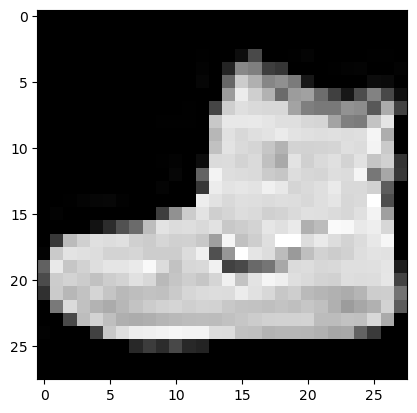

In [3]:
x_train = fmnist[0][0] # (60000, 28, 28) <class 'numpy.ndarray'>
y_train = fmnist[0][1] # (60000,)        <class 'numpy.ndarray'>
x_test = fmnist[1][0] # (10000, 28, 28)  <class 'numpy.ndarray'>
y_test = fmnist[1][1] # (10000,)         <class 'numpy.ndarray'>

print(y_train[0])
plt.imshow(x_train[0], cmap="gray")

print(x_train[0][1])

## mnist

5
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


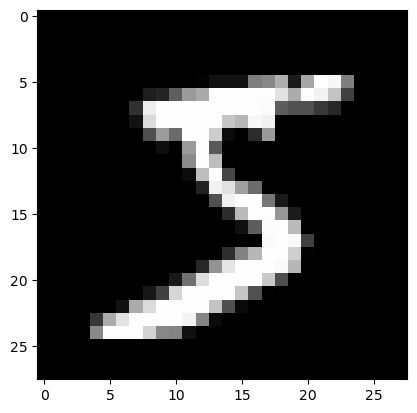

In [84]:
x_train = mnist[0][0] # (60000, 28, 28) <class 'numpy.ndarray'>
y_train = mnist[0][1] # (60000,)        <class 'numpy.ndarray'>
x_test = mnist[1][0] # (10000, 28, 28)  <class 'numpy.ndarray'>
y_test = mnist[1][1] # (10000,)         <class 'numpy.ndarray'>

print(y_train[0])
plt.imshow(X_train[0], cmap="gray")

print(x_train[0][1])

In [6]:
#Reshape the input 
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)
x_train, x_test = x_train / 255.0, x_test / 255.0

In [140]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

print(x_train[5][2])
print(y_train)

(60000, 28, 28, 1)
(10000, 28, 28, 1)
(60000,)
(10000,)
[[0.        ]
 [0.        ]
 [0.        ]
 [0.00392157]
 [0.        ]
 [0.1372549 ]
 [0.83921569]
 [0.74901961]
 [0.71764706]
 [0.69803922]
 [0.68627451]
 [0.65882353]
 [0.58823529]
 [0.63529412]
 [0.62352941]
 [0.59607843]
 [0.61960784]
 [0.70196078]
 [0.71764706]
 [0.74117647]
 [0.76470588]
 [0.7254902 ]
 [0.32156863]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]]
[9 0 0 ... 3 0 5]


In [9]:
i_shapes = x_train.shape[1:]

model1 = tf.keras.models.Sequential([ #LeNet5       
    tf.keras.layers.Conv2D(32, kernel_size=5, padding="same", activation='relu', input_shape=i_shapes),
    tf.keras.layers.MaxPool2D(pool_size=(2,2), strides=2),
    tf.keras.layers.Conv2D(64, kernel_size=5, padding='valid', activation='relu'),
    tf.keras.layers.MaxPool2D(pool_size=(2,2), strides=2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(84, activation='relu'),  
    tf.keras.layers.Dense(10, activation='softmax')
])

model2 = tf.keras.models.Sequential([ #LeNet5         
    tf.keras.layers.Conv2D(32, kernel_size=5, padding="same", activation='relu', input_shape=i_shapes),
    tf.keras.layers.MaxPool2D(strides=2),
    tf.keras.layers.Conv2D(48, kernel_size=5, padding='valid', activation='relu'),
    tf.keras.layers.MaxPool2D(strides=2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(84, activation='relu'),  
    tf.keras.layers.Dense(10, activation='softmax')
])

model3 = tf.keras.models.Sequential([ #AlexNet      
    tf.keras.layers.experimental.preprocessing.Resizing(224, 224, interpolation="bilinear", input_shape=x_train.shape[1:]),
    tf.keras.layers.Conv2D(96, 11, strides=4, padding='same'),
    tf.keras.layers.Lambda(tf.nn.local_response_normalization),
    tf.keras.layers.Activation('relu'),
    tf.keras.layers.MaxPooling2D(3, strides=2),
    tf.keras.layers.Conv2D(256, 5, strides=4, padding='same'),
    tf.keras.layers.Lambda(tf.nn.local_response_normalization),
    tf.keras.layers.Activation('relu'),
    tf.keras.layers.MaxPooling2D(3, strides=2),
    tf.keras.layers.Conv2D(384, 3, strides=4, padding='same'),
    tf.keras.layers.Activation('relu'),
    tf.keras.layers.Conv2D(384, 3, strides=4, padding='same'),
    tf.keras.layers.Activation('relu'),
    tf.keras.layers.Conv2D(256, 3, strides=4, padding='same'),
    tf.keras.layers.Activation('relu'),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(4096, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(4096, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(10, activation='softmax'),
])

# model = models.Sequential()
# model.add(layers.experimental.preprocessing.Resizing(224, 224, interpolation="bilinear", input_shape=x_train.shape[1:]))
# model.add(layers.Conv2D(96, 11, strides=4, padding='same'))
# model.add(layers.Lambda(tf.nn.local_response_normalization))
# model.add(layers.Activation('relu'))
# model.add(layers.MaxPooling2D(3, strides=2))
# model.add(layers.Conv2D(256, 5, strides=4, padding='same'))
# model.add(layers.Lambda(tf.nn.local_response_normalization))
# model.add(layers.Activation('relu'))
# model.add(layers.MaxPooling2D(3, strides=2))
# model.add(layers.Conv2D(384, 3, strides=4, padding='same'))
# model.add(layers.Activation('relu'))
# model.add(layers.Conv2D(384, 3, strides=4, padding='same'))
# model.add(layers.Activation('relu'))
# model.add(layers.Conv2D(256, 3, strides=4, padding='same'))
# model.add(layers.Activation('relu'))
# model.add(layers.Flatten())
# model.add(layers.Dense(4096, activation='relu'))
# model.add(layers.Dropout(0.5))
# model.add(layers.Dense(4096, activation='relu'))
# model.add(layers.Dropout(0.5))
# model.add(layers.Dense(10, activation='softmax'))
# model.summary()






In [10]:
from tensorflow.keras.callbacks import Callback
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.models import load_model


class MyCallback(Callback):
    def on_epoch_end(self, end, logs={}):
        if logs.get('val_acc') > 0.95:
            self.model.stop_training = True
            print('\n')
            print('목표 정확도 달성: 검증 정확도 %.4f' % logs.get('val_acc'))
my_callback = MyCallback()



def mdFit(model, num, X_train, y_train, my_callback) : # + best model select.

    model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy', #No OneHot Encoding
              metrics=['acc'])
    model.summary()
       
    best_model_path = f"./bestModel/LeNet5/best_cnn_model{num}.h5" 
    save_best_model = ModelCheckpoint(best_model_path,
                                      monitor='val_loss',
                                      save_best_only=True,
                                      save_weights_only=False)

    globals()[f'hist{num}'] = model.fit(
        x=X_train, y=y_train, batch_size=32, epochs=30, verbose=1,
        validation_split=0.2, callbacks=[my_callback, save_best_model]) #callbacks=callback, 
    
    globals()[f'best_model{num}'] = load_model(best_model_path)
    globals()[f'best_model{num}'].summary()
    
    
def mdEval(model, x_tst, y_tst) :
    model.evaluate(x_tst, y_tst, batch_size=30, verbose=1)
    
def mdPred(model, X_tst) :
    result = model.predict(X_tst)
    return result

In [12]:
mdFit(model3, 3, x_train, y_train, my_callback)

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resizing_2 (Resizing)       (None, 224, 224, 1)       0         
                                                                 
 conv2d_16 (Conv2D)          (None, 56, 56, 96)        11712     
                                                                 
 lambda_2 (Lambda)           (None, 56, 56, 96)        0         
                                                                 
 activation_1 (Activation)   (None, 56, 56, 96)        0         
                                                                 
 max_pooling2d_15 (MaxPoolin  (None, 27, 27, 96)       0         
 g2D)                                                            
                                                                 
 conv2d_17 (Conv2D)          (None, 7, 7, 256)         614656    
                                                      

KeyboardInterrupt: 

In [143]:
mdList = [model1, model2, model3]

for idx, md in enumerate(mdList) :
    mdFit(md, idx+1, x_train, y_train, my_callback)

Model: "sequential_16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_32 (Conv2D)          (None, 28, 28, 32)        832       
                                                                 
 max_pooling2d_32 (MaxPoolin  (None, 14, 14, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_33 (Conv2D)          (None, 10, 10, 64)        51264     
                                                                 
 max_pooling2d_33 (MaxPoolin  (None, 5, 5, 64)         0         
 g2D)                                                            
                                                                 
 flatten_16 (Flatten)        (None, 1600)              0         
                                                                 
 dense_48 (Dense)            (None, 256)             

 flatten_17 (Flatten)        (None, 1200)              0         
                                                                 
 dense_51 (Dense)            (None, 256)               307456    
                                                                 
 dense_52 (Dense)            (None, 84)                21588     
                                                                 
 dense_53 (Dense)            (None, 10)                850       
                                                                 
Total params: 369,174
Trainable params: 369,174
Non-trainable params: 0
_________________________________________________________________
Epoch 1/30
1500/1500 [==============================] - 36s 24ms/step - loss: 0.4647 - acc: 0.8288 - val_loss: 0.3446 - val_acc: 0.8763
Epoch 2/30
1500/1500 [==============================] - 35s 23ms/step - loss: 0.3009 - acc: 0.8893 - val_loss: 0.2889 - val_acc: 0.8949
Epoch 3/30
1500/1500 [==============================] - 38s 25

KeyboardInterrupt: 

In [135]:
bestMdList = [best_model1, best_model2]

for num, model in enumerate(bestMdList):
    mdEval(model, x_test, y_test)


334/334 [==============================] - 4s 11ms/step - loss: 0.0685 - acc: 0.9786
